In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data import data_loader

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [2]:
train_generator, val_generator, test_generator = data_loader.load_data()

Found 70499 images belonging to 29 classes.
Found 7830 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [3]:
for data_batch, labels_batch in train_generator:
    input_shape = data_batch.shape[1:]
    num_classes = labels_batch.shape[1]
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64, 29)


In [4]:
input_shape

(150, 150, 3)

In [16]:
256*2

512

In [39]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                        

In [41]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [42]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs=10
)

Epoch 1/10


2022-12-13 19:16:30.679846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1102/1102 [==============================] - ETA: 0s - loss: 0.7931 - accuracy: 0.7501

2022-12-13 19:18:06.970673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1102/1102 [==============================] - 103s 93ms/step - loss: 0.7931 - accuracy: 0.7501 - val_loss: 0.9302 - val_accuracy: 0.7585
Epoch 2/10
1102/1102 [==============================] - 102s 92ms/step - loss: 0.1125 - accuracy: 0.9624 - val_loss: 0.7096 - val_accuracy: 0.8055
Epoch 3/10
1102/1102 [==============================] - 101s 92ms/step - loss: 0.0743 - accuracy: 0.9759 - val_loss: 0.6036 - val_accuracy: 0.8391
Epoch 4/10
1102/1102 [==============================] - 101s 92ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.5983 - val_accuracy: 0.8223
Epoch 5/10
1102/1102 [==============================] - 101s 92ms/step - loss: 0.0521 - accuracy: 0.9851 - val_loss: 0.6959 - val_accuracy: 0.8295
Epoch 6/10
1102/1102 [==============================] - 101s 92ms/step - loss: 0.0519 - accuracy: 0.9852 - val_loss: 0.7177 - val_accuracy: 0.8290
Epoch 7/10
1102/1102 [==============================] - 102s 92ms/step - loss: 0.0481 - accuracy: 0.9866 - val_loss: 0.5234 - val

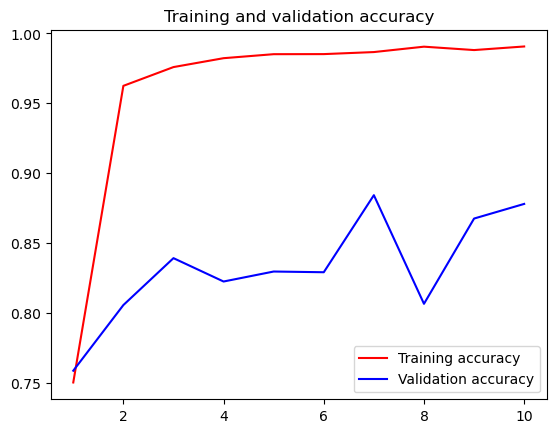

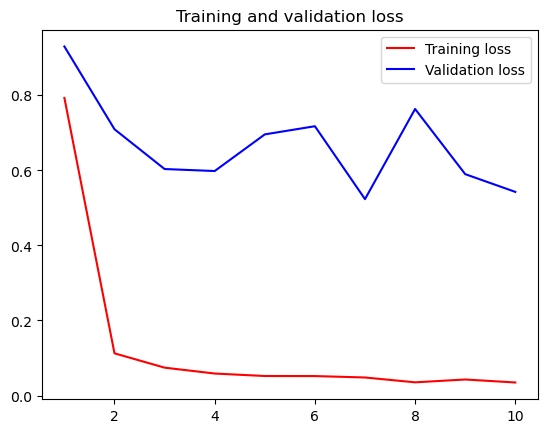

In [43]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
scores = model.evaluate(test_generator)

print(f'Test {model.metrics_names[1]} is {100 * scores[1]}')
print(f'Test {model.metrics_names[0]} is {scores[0]}')

136/136 [==============================] - 8s 54ms/step - loss: 0.0571 - accuracy: 0.9841
Test accuracy is 98.41379523277283
Test loss is 0.057078149169683456


In [45]:
from sklearn.metrics import classification_report
 
test_labels=test_generator.classes 

predictions=model.predict(test_generator, verbose=1)

y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

  1/136 [..............................] - ETA: 32s

2022-12-13 19:38:06.221070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


136/136 [==============================] - 8s 59ms/step
              precision    recall  f1-score   support

           0       0.04      0.04      0.04       300
           1       0.03      0.03      0.03       300
           2       0.04      0.04      0.04       300
           3       0.03      0.03      0.03       300
           4       0.02      0.02      0.02       300
           5       0.03      0.03      0.03       300
           6       0.06      0.06      0.06       300
           7       0.03      0.03      0.03       300
           8       0.03      0.03      0.03       300
           9       0.02      0.02      0.02       300
          10       0.03      0.03      0.03       300
          11       0.05      0.05      0.05       300
          12       0.04      0.04      0.04       300
          13       0.03      0.03      0.03       300
          14       0.06      0.06      0.06       300
          15       0.03      0.03      0.03       300
          16       0.02  

In [38]:
from tensorflow.keras import backend
backend.clear_session()